In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
#Question 1 will be what is the most popular chess opening and what are the best alternatives
#Q1 outcome variable will be most_played, second_popular, third_popular
#To explore the outcome varaible most_played, I plan to look at how many times an opening is played,
#Q1 will contain the following models: times opening played(opening_name variable) and which opening (opening_name)


#For all of these questions, I will also develop functions to help in my analyses


In [3]:
#Question 2 will be which chess opening results are definitive: win or loss (no draws), and how many wins and losses are there in the dataset
#Question 2 will have the outcome variable opening_wins to detect which opening has the most definitive conclusions
#To explore the outcome variable, I plan to look at the opening_names and see which opening contains the most "win","loss","draw" for the top 3 most popular openings as found in Q1
#Q2 will contain the following models: times opening played, how many wins per top 3 opening, and 

In [4]:
#Question 3 will be which chess opening results in the most and which has the least amount of moves
#Q3 outcome variable will be most_moves and least_moves
#To explore the outcome variable, I plan to look at the average amount of moves for the entire dataset, the opening which has the average of most moves, and the opening with the least moves
#To explore this, I will use pivot tables
#Q3 will contain the following models: average moves per top openings and the min/max for each too

In [5]:
chess_set = pd.read_csv("/kaggle/input/chess/games.csv")
print(chess_set.head())
chess_set.info()

         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

Van't Kruijs Opening                                              368
Sicilian Defense                                                  358
Sicilian Defense: Bowdler Attack                                  296
Scotch Game                                                       271
French Defense: Knight Variation                                  271
                                                                 ... 
Sicilian Defense: Kupreichik Variation                              1
Modern Defense: Lizard Defense |  Mittenberger Gambit               1
French Defense: Rubinstein Variation |  Kasparov Attack             1
French Defense: Tarrasch Variation |  Open System |  Main Line      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation        1
Name: opening_name, Length: 1477, dtype: int64


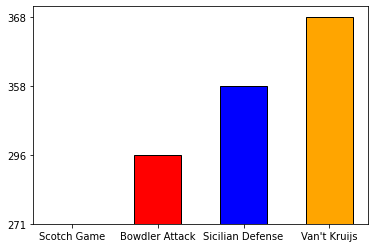

In [6]:
#Q1 Find out how many different openings are played in the data set
open_count = chess_set["opening_name"].value_counts()
print(open_count)
#This shows that Van't Kruijs Opening is used 368 times
#The second most popular is the Sicilian Defense
#The third most popular is the Sicilian defense: Bowdler Attack
top_3_openings = ["Scotch Game","Bowdler Attack","Sicilian Defense","Van't Kruijs"]
amount_played = ["271","296","358","368"]
plt.bar(top_3_openings,amount_played,width=.55,bottom=0, color=['green','red','blue','orange'],edgecolor='black')
plt.xlabel=("Opening name")
plt.ylabel=("Times Played")
plt.title=("Top 3 Openings")
plt.show()
#I am unable to get the chart to show the data for the Scotch game




In [7]:
#Question 2 will be which chess opening results are definitive: win or loss (no draws), and how many wins and losses are there in the dataset

                            